<a href="https://colab.research.google.com/github/k-avya/New-Year-Resolution/blob/main/NEW_YEAR_RESOLUTION_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
# text processing libraries
import string 
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV


from nltk import FreqDist, word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving new_years_resolutions_dfe.csv to new_years_resolutions_dfe.csv


In [ ]:
# Load data
train = pd.read_csv("new_years_resolutions_dfe.csv")


train.head()

,resolution_topics,gender,name,resolution_category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",NaN,2014-12-31T10:48:00,2014-12-31,550363000000000000,Southern California,CA,Pacific Time (US & Canada),West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,2014-12-31T10:47:00,2014-12-31,550363000000000000,New Jersey,NJ,Central Time (US & Canada),Northeast
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,NaN,2014-12-31T10:46:00,2014-12-31,550362000000000000,Hollywood,CA,Eastern Time (US & Canada),West
3,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,NaN,2014-12-31T10:45:00,2014-12-31,550362000000000000,Metro NYC,NY,NaN,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,2014-12-31T10:44:00,2014-12-31,550362000000000000,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


In [ ]:
print('Training Data Shape',train.shape)


Training Data Shape (5002, 14)


In [ ]:
x=train['retweet_count'].value_counts()
x

0.0       2343
1.0        458
2.0        135
3.0         54
4.0         29
5.0         17
6.0         15
8.0          9
13.0         6
7.0          6
16.0         5
14.0         5
12.0         5
9.0          4
11.0         3
29.0         3
15.0         3
17.0         2
45.0         2
59.0         2
30.0         2
10.0         1
18.0         1
80.0         1
60.0         1
26.0         1
64.0         1
149.0        1
352.0        1
62.0         1
511.0        1
1035.0       1
989.0        1
1897.0       1
27.0         1
42.0         1
100.0        1
31.0         1
21.0         1
41.0         1
1020.0       1
123.0        1
49.0         1
642.0        1
271.0        1
4234.0       1
88.0         1
22.0         1
20.0         1
Name: retweet_count, dtype: int64

In [ ]:
y=train['resolution_category'].value_counts()
y

Personal Growth                 1777
Humor                           1009
Health & Fitness                 839
Recreation & Leisure             466
Family/Friends/Relationships     349
Finance                          176
Career                           126
Education/Training                89
Time Management/Organization      87
Philanthropic                     84
Name: resolution_category, dtype: int64

In [ ]:
temp = train.groupby('retweet_count').count()['resolution_category'].reset_index()
temp['label'] = temp['retweet_count'].apply(lambda x : 'Followed by majority' if x>=100 else 'Not followed by majority')
temp

,retweet_count,resolution_category,label
0,0.0,2343,Not followed by majority
1,1.0,458,Not followed by majority
2,2.0,135,Not followed by majority
3,3.0,54,Not followed by majority
4,4.0,29,Not followed by majority
5,5.0,17,Not followed by majority
6,6.0,15,Not followed by majority
7,7.0,6,Not followed by majority
8,8.0,9,Not followed by majority
9,9.0,4,Not followed by majority


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparing retweets')

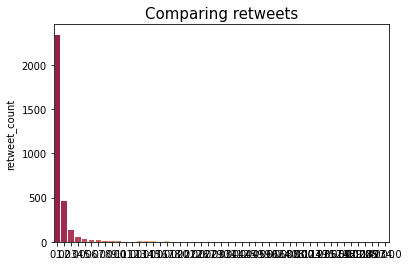

In [ ]:
sns.barplot(train['retweet_count'].value_counts().index,train['retweet_count'].value_counts()
            ,palette='Spectral')
plt.title('Comparing retweets',fontsize=15)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['text'])
print(vectorizer.get_feature_names())
p=vectorizer.get_feature_names()


['000', '01', '015', '02am', '03', '03govidp0m', '04', '050', '05jy6dr0m7', '0dzlrttkc8', '0fip12rofa', '0fpxxkiery', '0fwwwgfvbp', '0hgb0l1ffk', '0i30qcidc0', '0r4jrbgbmp', '0wdvtmx7u2', '10', '100', '1000', '100lbs', '1024', '1080', '1080i', '1080p', '10am', '10k', '10lbs', '10th', '10x', '11', '110', '1100', '110lbs', '117th', '11am', '12', '120', '120sports', '127243', '1280', '1280x1600', '12atzvlgtq', '12days', '12o', '13', '13_roach', '14', '1440', '1485', '15', '150', '1500', '157143', '159', '15k', '15lbs', '15poundstogo', '15th', '16', '165', '17', '18', '180', '1800', '187', '19', '190', '1920', '1920x1080', '19376316819', '195lbs', '1967boldwriter', '1969', '1985', '1996', '1998', '1999', '1and0', '1d', '1for1', '1hcnjhmo7l', '1k', '1lindalee', '1lpm3buqg5', '1oaaq0nx0t', '1orv5kfixt', '1problem', '1st', '1tlayg0ura', '1u', '1x', '1z48gumjph', '1zderlt0zl', '1zhfih0xwd', '20', '200', '2000', '2009', '200dayswithoutrayban', '200lbs', '2011', '2012', '2013', '2014', '2014memo

In [ ]:
df=pd.DataFrame(p,columns=['words'])
df.to_excel(r'C:\Users\kavya srivastava\Downloads\export_dataframe_words.xlsx',index=True)

In [ ]:
b=train.isnull().sum()
b

resolution_topics         0
gender                    0
name                      0
resolution_category       0
retweet_count          1866
text                      0
tweet_coord            4775
tweet_created             0
tweet_date                0
tweet_id                  0
tweet_location            0
tweet_state               0
user_timezone          1299
tweet_region              0
dtype: int64

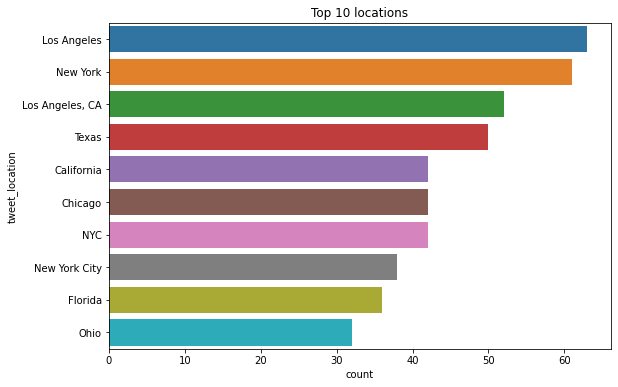

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(9,6))
# Bar chart showing amount of both target values and groups the top 10 location
sns.countplot(y=train.tweet_location, order = train.tweet_location.value_counts().iloc[:10].index)
# Add title
plt.title('Top 10 locations')
# display a graph 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


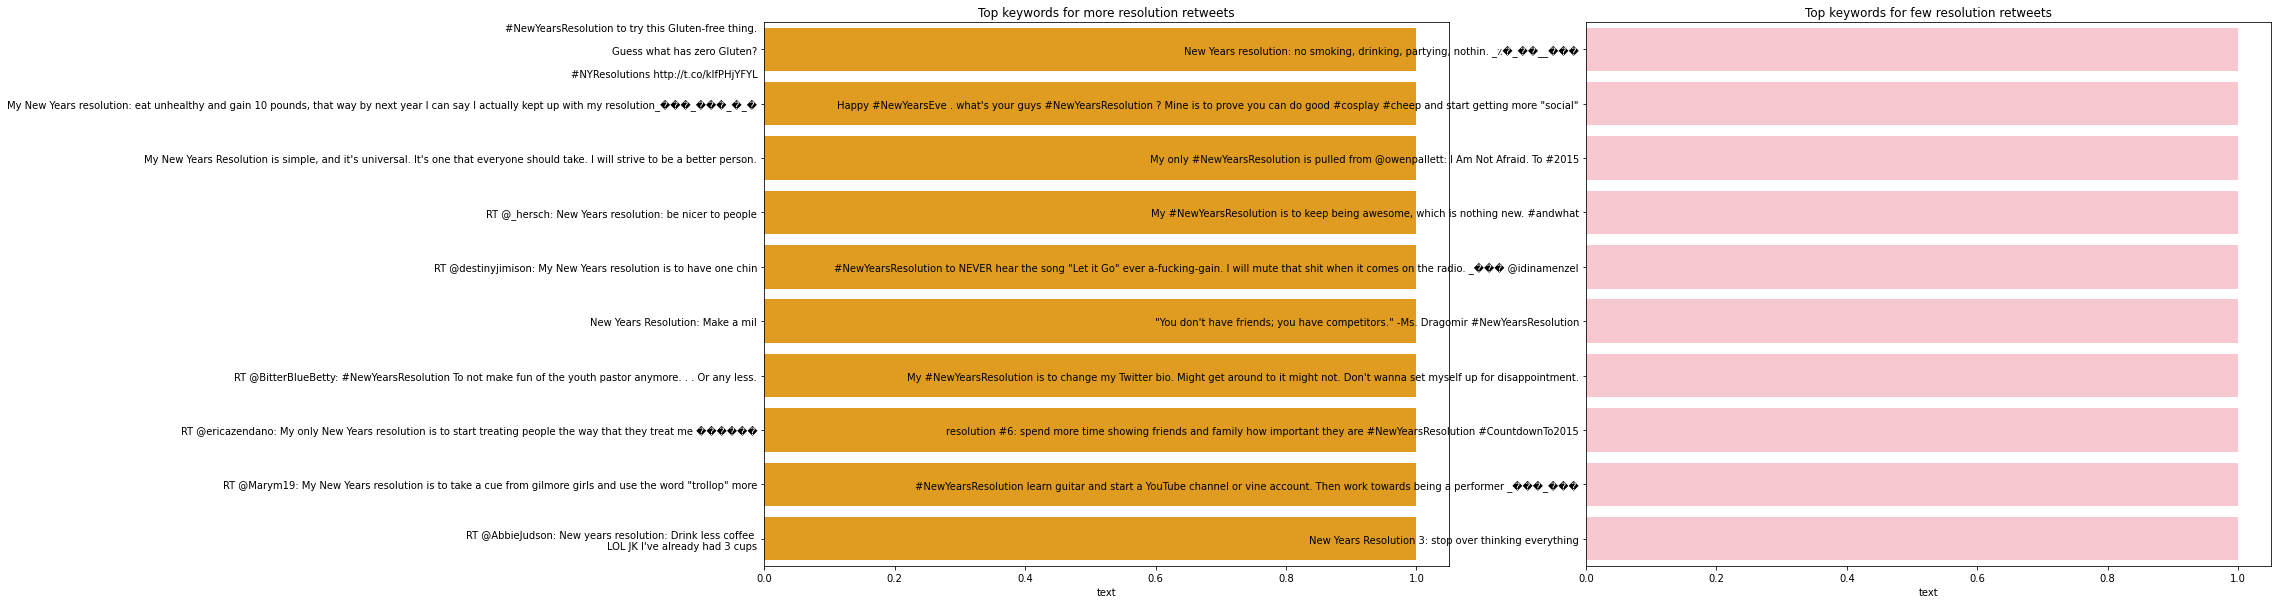

In [ ]:
a = train[train.retweet_count>=1].text.value_counts().head(10)
b = train[train.retweet_count==0].text.value_counts().head(10)

plt.figure(figsize=(27,10))

plt.subplot(121)
sns.barplot(a, a.index, color='orange')
plt.title('Top keywords for more resolution retweets')


plt.subplot(122)
sns.barplot(b, b.index, color='pink')
plt.title('Top keywords for few resolution retweets')

plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

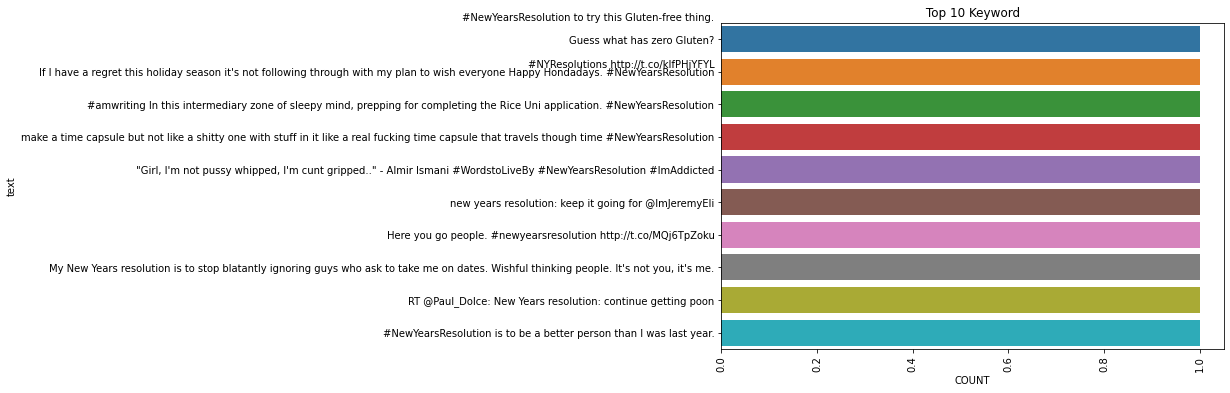

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(9,6))
# Bar chart showing amount of both target values
sns.barplot(y=train['text'].value_counts()[:10].index,
            x=train['text'].value_counts()[:10])
# Add title
plt.title(' Top 10 Keyword ') 
# Add label for x axis
plt.xlabel('COUNT')
# Add label for y axis
plt.ylabel('text')
# Rotate the label text for hotizontal axis
plt.xticks(rotation=90) 

**CHARACTERS IN MOST VS LEAST RETWEETS**

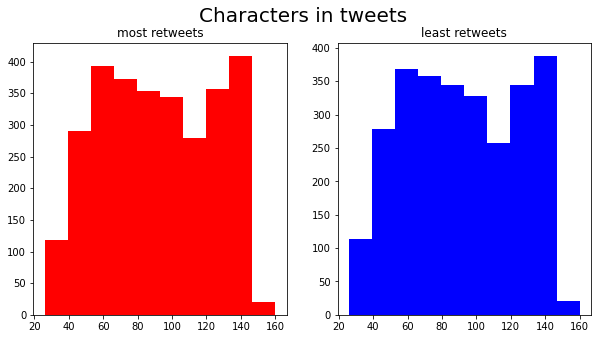

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['retweet_count']<=2]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('most retweets')
tweet_len=train[train['retweet_count']<=1]['text'].str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('least retweets')
fig.suptitle('Characters in tweets',fontsize=20)

plt.show()


**WORDS IN MOST VS LEAST RETWEETS**

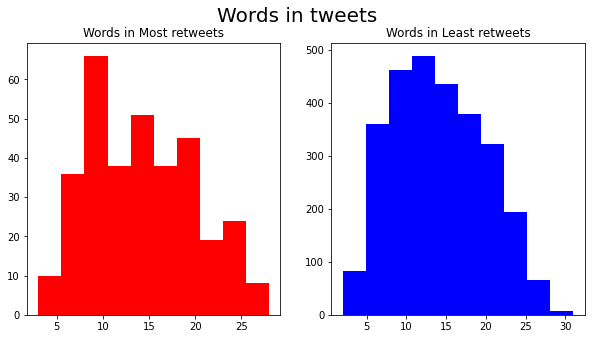

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['retweet_count']>=2]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Words in Most retweets')
tweet_len=train[train['retweet_count']<=1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('Words in Least retweets')
fig.suptitle('Words in tweets',fontsize=20)
plt.show()

In [ ]:
for col in ['text', 'tweet_location']:
    train[col] = train[col].fillna(f'no_{col}')
train.head()

,resolution_topics,gender,name,resolution_category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",NaN,2014-12-31T10:48:00,2014-12-31,550363000000000000,Southern California,CA,Pacific Time (US & Canada),West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,2014-12-31T10:47:00,2014-12-31,550363000000000000,New Jersey,NJ,Central Time (US & Canada),Northeast
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,NaN,2014-12-31T10:46:00,2014-12-31,550362000000000000,Hollywood,CA,Eastern Time (US & Canada),West
3,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,NaN,2014-12-31T10:45:00,2014-12-31,550362000000000000,Metro NYC,NY,NaN,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,2014-12-31T10:44:00,2014-12-31,550362000000000000,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


In [ ]:
pip install missingno


In [ ]:
import missingno as msno

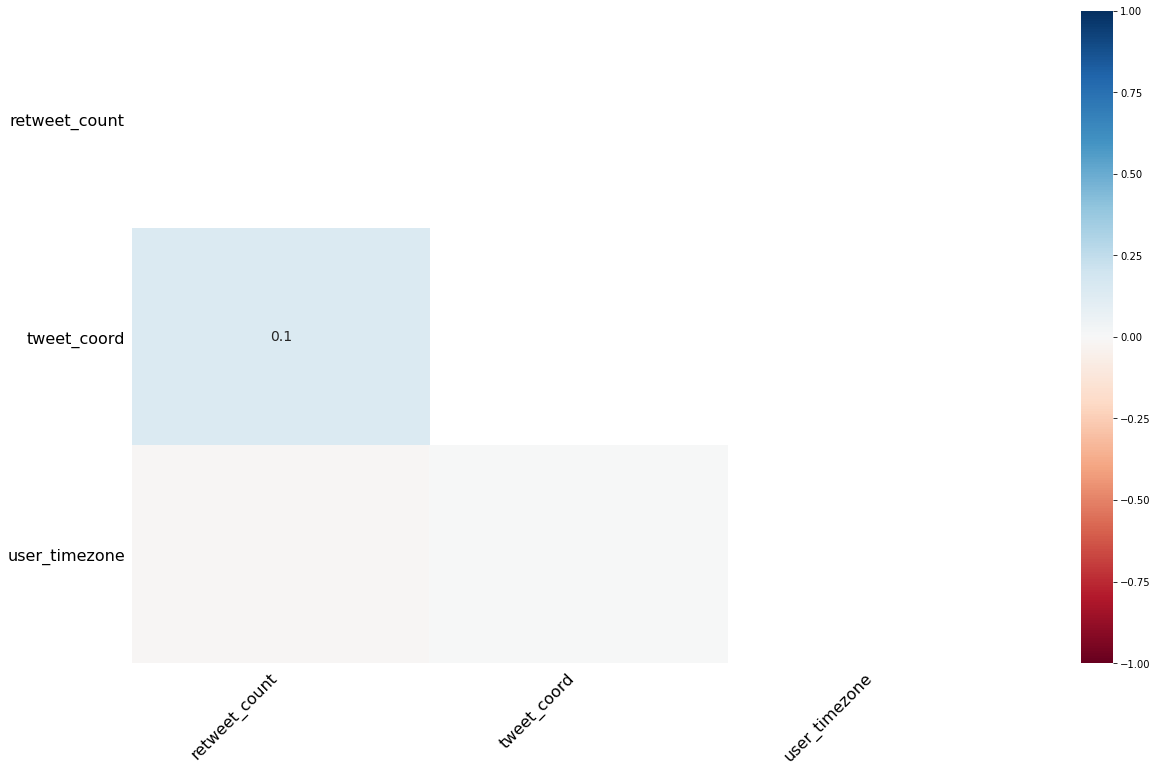

In [ ]:
msno.heatmap(train)

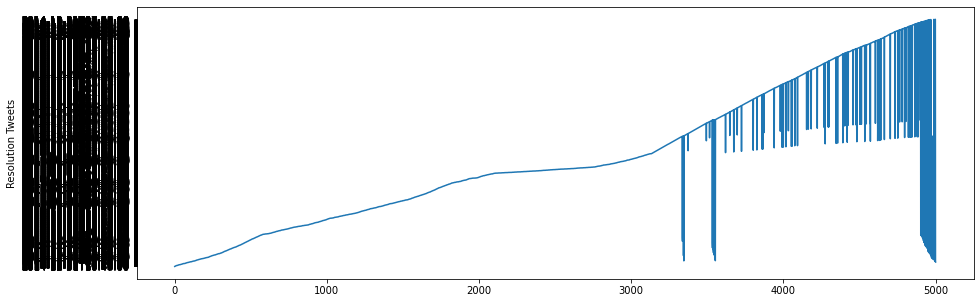

In [ ]:
plt.figure(figsize=(15, 5))
plt.ylabel("Resolution Tweets")
plt.plot(train['tweet_created'])

In [ ]:
pip install PyFlux

     |████████████████████████████████| 1.3MB 6.7MB/s 
     |████████████████████████████████| 962kB 16.5MB/s 
  Created wheel for PyFlux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656546 sha256=188f4e1ad350fe8d4b77e1e3d178e4a1144ae725213aec6175751ec8984e7a3c
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built PyFlux


In [ ]:
pip install chart-studio

     |████████████████████████████████| 71kB 3.9MB/s 


In [ ]:
train.drop(["name", "tweet_coord", "tweet_id", 
                            "tweet_created"],axis=1, inplace = True)
train 
j=train

In [ ]:
m=j.groupby(train.columns.tolist(),as_index=False).size()
m

,resolution_topics,gender,resolution_category,retweet_count,text,tweet_date,tweet_location,tweet_state,user_timezone,tweet_region,size
0,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution is a goal and I plan to st...,2014-12-31,South of the Mason-Dixon,PA,Atlantic Time (Canada),Northeast,1
1,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution keep staying up till the s...,2015-01-01,Washington D.C.,DC,Eastern Time (US & Canada),South,1
2,Acheive My Goals,female,Personal Growth,0.0,"#NewYearsResolution to eat more, to eat all th...",2014-12-31,Florida,FL,Atlantic Time (Canada),South,1
3,Acheive My Goals,female,Personal Growth,0.0,"#NewYearsResolution wear heels more often, get...",2014-12-31,"Denver, Colorado",CO,Mountain Time (US & Canada),West,1
4,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution �ۢ Speak more Spanish,2015-01-01,Texas,TX,Central Time (US & Canada),South,1
...,...,...,...,...,...,...,...,...,...,...,...
2308,Work for myself,male,Career,0.0,#NewYearsResolution #2 is to get my #SharksHea...,2015-01-01,"Stockton, Ca",CA,Pacific Time (US & Canada),West,1
2309,Work for myself,male,Career,0.0,"#NewYearsResolution 4 business days ea month, ...",2014-12-31,Colorado Springs,CO,Mountain Time (US & Canada),West,1
2310,Work for myself,male,Career,0.0,@nflnetwork my new years resolution is to find...,2015-01-01,Tyler Texas,TX,Central Time (US & Canada),South,1
2311,Work for myself,male,Career,0.0,New Years Resolution. Get more work done. Need...,2015-01-02,Atlanta,GA,Eastern Time (US & Canada),South,1


In [ ]:
frames = [m, temp]
result = pd.concat(frames)
result

,resolution_topics,gender,resolution_category,retweet_count,text,tweet_date,tweet_location,tweet_state,user_timezone,tweet_region,size,label
0,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution is a goal and I plan to st...,2014-12-31,South of the Mason-Dixon,PA,Atlantic Time (Canada),Northeast,1.0,NaN
1,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution keep staying up till the s...,2015-01-01,Washington D.C.,DC,Eastern Time (US & Canada),South,1.0,NaN
2,Acheive My Goals,female,Personal Growth,0.0,"#NewYearsResolution to eat more, to eat all th...",2014-12-31,Florida,FL,Atlantic Time (Canada),South,1.0,NaN
3,Acheive My Goals,female,Personal Growth,0.0,"#NewYearsResolution wear heels more often, get...",2014-12-31,"Denver, Colorado",CO,Mountain Time (US & Canada),West,1.0,NaN
4,Acheive My Goals,female,Personal Growth,0.0,#NewYearsResolution �ۢ Speak more Spanish,2015-01-01,Texas,TX,Central Time (US & Canada),South,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44,NaN,NaN,1,989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Followed by majority
45,NaN,NaN,1,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Followed by majority
46,NaN,NaN,1,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Followed by majority
47,NaN,NaN,1,1897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Followed by majority


In [ ]:
def cleanString(text):
    newstring = incomingString
    newstring = newstring.replace("!","")
    newstring = newstring.replace("@","")
    newstring = newstring.replace("#","")
    newstring = newstring.replace("$","")
    newstring = newstring.replace("%","")
    newstring = newstring.replace("^","")
    newstring = newstring.replace("&","and")
    newstring = newstring.replace("*","")
    newstring = newstring.replace("(","")
    newstring = newstring.replace(")","")
    newstring = newstring.replace("+","")
    newstring = newstring.replace("=","")
    newstring = newstring.replace("?","")
    newstring = newstring.replace("\'","")
    newstring = newstring.replace("\"","")
    newstring = newstring.replace("{","")
    newstring = newstring.replace("}","")
    newstring = newstring.replace("[","")
    newstring = newstring.replace("]","")
    newstring = newstring.replace("<","")
    newstring = newstring.replace(">","")
    newstring = newstring.replace("~","")
    newstring = newstring.replace("`","")
    newstring = newstring.replace(":","")
    newstring = newstring.replace(";","")
    newstring = newstring.replace("|","")
    newstring = newstring.replace("\\","")
    newstring = newstring.replace("/","") 
    newstring = newstring.replace("#","")        
    return newstring

In [ ]:
import xlwt 
  
workbook = xlwt.Workbook()  
  
sheet = workbook.add_sheet("MKR DATA") 
  
# Specifying style 
style = xlwt.easyxf('font: bold 1') 
  
# Specifying column 
sheet.write(1170,3, 'SAMPLE', style) 
workbook.save("data_frames") 

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 153kB 5.9MB/s 


In [ ]:
df=pd.DataFrame(result,columns=['resolution_topics','gender','resolution_category','retweet_count','text','tweet_date','tweet_location','tweet_state','user_timezone','tweet_region','label'])
df.to_excel(r'C:\Users\kavya srivastava\Downloads\export_dataframe_resolution.xlsx',index=True)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving New-years-resolutions-DFE.csv to New-years-resolutions-DFE.csv


In [ ]:
sample_submission = pd.read_csv("    ")
sample_submission["target"] = clf.predict(test_vectors)
sample_submission.to_csv("submission.csv", index=False)